# api介绍
- sklearn.cluster.KMeans(n_clusters=8)
- 参数:
    - n_clusters:开始的聚类中心数量
        - 整型，缺省值=8，生成的聚类数，即产生的质心（centroids）数。
- 方法:
    - estimator.fit(x)
    - estimator.predict(x)
    - estimator.fit_predict(x)

计算聚类中心并预测每个样本属于哪个类别,相当于先调用fit(x),然后再调用predict(x)

创建数据集

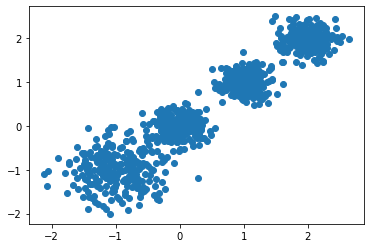

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 创建数据集
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本4个特征，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=4, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2],
                  random_state=9)

# 数据集可视化
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

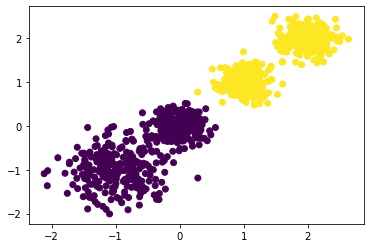

3116.1706763322227


In [9]:
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
# 分别尝试n_cluses=2\3\4,然后查看聚类效果
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# 用Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X, y_pred))

# API
- sklearn.feature_selection.VarianceThreshold(threshold = 0.0)
- 删除所有低方差特征
- Variance.fit_transform(X)
- X:numpy array格式的数据[n_samples,n_features]
- 返回值：训练集差异低于threshold的特征将被删除。默认值是保留所有非零方差特征，即删除所有样本中具有相同值的特征。

In [ ]:
def variance_demo():
    """
    删除低方差特征——特征选择
    :return: None
    """
    data = pd.read_csv("factor_returns.csv")
    print(data)
    # 1、实例化一个转换器类
    transfer = VarianceThreshold(threshold=1)
    # 2、调用fit_transform
    data = transfer.fit_transform(data.iloc[:, 1:10])
    print("删除低方差特征的结果：\n", data)
    print("形状：\n", data.shape)

    return None

# 皮尔逊相关系数(Pearson Correlation Coefficient)
from scipy.stats import pearsonr

x : (N,) array_like

y : (N,) array_like Returns: (Pearson’s correlation coefficient, p-value)

# 主成分分析
定义：高维数据转化为低维数据的过程，在此过程中可能会舍弃原有数据、创造新的变量

作用：是数据维数压缩，尽可能降低原数据的维数（复杂度），损失少量信息。

应用：回归分析或者聚类分析当中

# API
- sklearn.decomposition.PCA(n_components=None)
- 将数据分解为较低维数空间
    - n_components:
        - 小数：表示保留百分之多少的信息
        - 整数：减少到多少特征

PCA.fit_transform(X) 

X:numpy array格式的数据[n_samples,n_features]

返回值：转换后指定维度的array

In [14]:
[[2,8,4,5],
[6,3,0,8],
[5,4,9,1]]
from sklearn.decomposition import PCA

def pca_demo():
    """
    对数据进行PCA降维
    :return: None
    """
    data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]

    # 1、实例化PCA, 小数——保留多少信息
    transfer = PCA(n_components=0.9)
    # 2、调用fit_transform
    data1 = transfer.fit_transform(data)

    print("保留90%的信息，降维结果为：\n", data1)

    # 1、实例化PCA, 整数——指定降维到的维数
    transfer2 = PCA(n_components=3)
    # 2、调用fit_transform
    data2 = transfer2.fit_transform(data)
    print("降维到3维的结果：\n", data2)

    return None

In [15]:
pca_demo()

保留90%的信息，降维结果为：
 [[-3.13587302e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
降维到3维的结果：
 [[-3.13587302e-16  3.82970843e+00  4.59544715e-16]
 [-5.74456265e+00 -1.91485422e+00  4.59544715e-16]
 [ 5.74456265e+00 -1.91485422e+00  4.59544715e-16]]


# 案例：探究用户对物品类别的喜好细分降维

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
# 获取数据
order_product = pd.read_csv("./data/instacart/order_products__prior.csv")
products = pd.read_csv("./data/instacart/products.csv")
orders = pd.read_csv("./data/instacart/orders.csv")
aisles = pd.read_csv("./data/instacart/aisles.csv")

In [18]:
# 数据基本处理
# 2.1 合并表格
table1 = pd.merge(order_product, products, on=["product_id", "product_id"])
table2 = pd.merge(table1, orders, on=["order_id", "order_id"])
table = pd.merge(table2, aisles, on=["aisle_id", "aisle_id"])

In [21]:
table.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


In [22]:
#交叉表合并
table = pd.crosstab(table["user_id"], table["aisle"])
table.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [23]:
# 数据截取
table = table[:1000]

In [24]:
# 特征工程PCA
transfer = PCA(n_components=0.9)
data = transfer.fit_transform(table)

In [27]:
# 机器学习（k-means）
estimator = KMeans(n_clusters=8, random_state=22)
y_predict = estimator.fit_predict(data)

In [28]:
# 模型评估
silhouette_score(data, y_predict)

0.4640056725989441